## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
from keras.datasets import cifar10
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

In [4]:
## 資料前處理
"""
Your code here
"""
# 資料前處理 - 標準化
# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
def preproc_x(x):
    x = (x-x.mean())/(x.max()-x.min())
    x = x.reshape(len(x), -1)
    return x

# 將目標轉為 one-hot encoding
def preproc_y(y):
    y = keras.utils.to_categorical(y, num_classes=10)
    return y 

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330   

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

c:\Users\wei-jyun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 5s 14ms/step - loss: 1.6852 - accuracy: 0.3994 - val_loss: 1.5189 - val_accuracy: 0.4616
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4458 - accuracy: 0.4889 - val_loss: 1.4200 - val_accuracy: 0.4972
Epoch 3/100
196/196 [==============================] - 2s 10ms/step - loss: 1.3239 - accuracy: 0.5349 - val_loss: 1.3832 - val_accuracy: 0.5100
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 1.2210 - accuracy: 0.5714 - val_loss: 1.3706 - val_accuracy: 0.5236
Epoch 5/100
196/196 [==============================] - 2s 10ms/step - loss: 1.1411 - accuracy: 0.5988 - val_loss: 1.3654 - val_accuracy: 0.5265
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.0573 - accuracy: 0.6285 - val_loss: 1.3595 - val_accuracy: 0.5214
Epoch 7/100
196/196 [==============================] - 3s 13ms/step - loss: 0.9823 - accuracy: 0.6529 - val_loss: 1.3661 - val_accuracy:

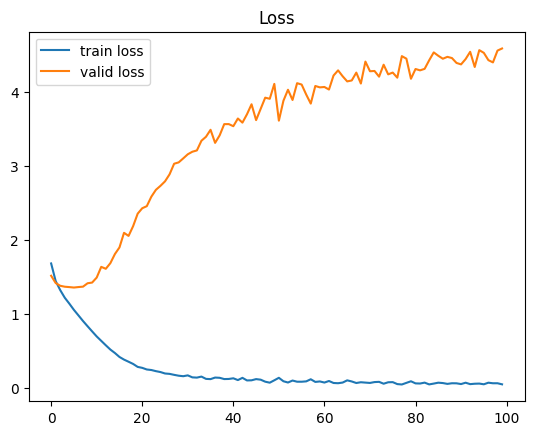

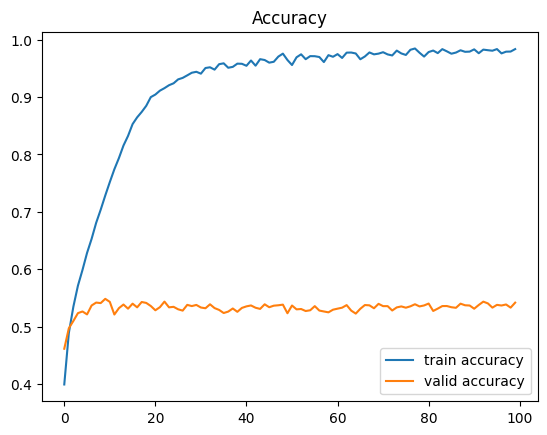

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()